# Exercise 17

### c)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Y = pd.read_csv("soccer.csv")

def log(p):
    return p*np.log2(p)


Z =[Y['weather_forecast'][0]]


for i in range(len(Y)):
    if Y['weather_forecast'][i] not in Z:
        Z.append(Y['weather_forecast'][i])
        
Z[2]

len(Y["weather_forecast"][Y["weather_forecast"] == "sunny"])

#Z = enumerate(Z)
        
#for counter, value in Z:
#    print(counter, value)

5

0.9402859586706311 1.5774062828523454


/tmp/ipykernel_120/992042126.py:8: RuntimeWarning: divide by zero encountered in log2
  return p*np.log2(p)
/tmp/ipykernel_120/992042126.py:8: RuntimeWarning: invalid value encountered in double_scalars
  return p*np.log2(p)


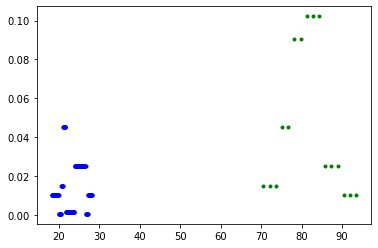

In [4]:
def H_Y(Y, at, Z): # at: attribute, Z: list of different values of attribute
    entropy = 0
    length = len(Y)
    for i in range(len(Z)):
        n = len(Y[at][Y[at] == Z[i]])
        entropy = entropy -n/length * np.log2(n/length)
    return entropy
a = H_Y(Y, "soccer", [True, False])  
b = H_Y(Y, "weather_forecast", ["cloudy", "rainy", "sunny"])
print(a, b)


def IG_cardinal(Y, at, cut, dt):     # at: attribute, dt: decision target
    n = len(Y)
    p = len(Y[Y[dt] == True])/n # propability of decision target = True
    h_y = -(log(p) + log(1-p))
    
    subspace1 = Y[Y[at] <= cut]
    subspace2 = Y[Y[at] > cut]
    n1 = len(subspace1)
    n2 = n - n1
    
    p11 = len(subspace1[subspace1[dt] == True])/n1
    p12 = len(subspace1[subspace1[dt] == False])/n1
    
    p21 = len(subspace2[subspace2[dt] == True])/n2
    p22 = len(subspace2[subspace2[dt] == False])/n2
    
    h_yx = -n1/n*(log(p11) + log(p12)) - n2/n*(log(p21) + log(p22))
    
    return h_y - h_yx
IG_cardinal(Y, "temperature", 28, "soccer")    
IG_cardinal(Y, "humidity", 80, "soccer") 

def IG_nominal(Y, at, dt, cut):
    a = b

fig, axs = plt.subplots(1,1)

cuts = np.linspace(17.9, 29.3, 200)

for i in range(len(cuts)):
    axs.plot(cuts[i], IG_cardinal(Y, "temperature", cuts[i], "soccer"), marker = ".", color = "blue")
    
cuts2 = np.linspace(66, 95, 20)

for i in range(len(cuts2)):
    axs.plot(cuts2[i], IG_cardinal(Y, "humidity", cuts2[i], "soccer"), marker = ".", color = "green")